In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import os
import glob
from functools import reduce

In [2]:
lc_u = np.load('uid_per_shb_fatigue.npy')

In [3]:
lc_u2=np.load('uid_per_shb_fatigue(1).npy')

In [4]:
path = os.getcwd()+'/user_df/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

df_lcu = []
demo_info = []
uid = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    for var in ['sleep', 'hr', 'steps']:
        if var not in df.columns:
            df[var] = np.nan
    df_lcu.append(df)
    demo_info.append(f.split("/")[-1].split('.')[0])
    uid.append(int(f.split("/")[-1].split('.')[1][1:])) 
      
sex = [re.split('(\d+)',demo_info[i])[0] for i in range(len(demo_info))]
age = [int(re.split('(\d+)',demo_info[i])[1]) for i in range(len(demo_info))] 

df_lcu.pop(31)
uid.pop(31)
sex.pop(31)
age.pop(31)
df_lcu.pop(67)
uid.pop(67)
sex.pop(67)
age.pop(67)

60

In [9]:
# get age
def get_symptoms(user_ids):
    
    if isinstance(user_ids, int) or isinstance(user_ids, np.int64):
        formatter = f'({user_ids})'
    elif len(user_ids) == 1:
        formatter = f'({user_ids[0]})'
    else:
        formatter = tuple(user_ids) 
    
    query = f"""
    select
        a.id,
        a.user_id, 
        a.element,
        a.created_at
    from 
        rocs.datenspende.answers a
    where 
        a.user_id IN {formatter}  and (a.question = 137 or a.question = 8 )

    """
    
    
 

    df_all = query_pg_df(query)
    df_all['dt'] = pd.to_datetime(df_all['created_at'],unit='ms')
    df_all['dt'] = df_all['dt'].dt.date
    df_all = df_all[df_all['dt'] >= pd.to_datetime('2021-10-25')]
    df_all = df_all[['user_id', 'element', 'dt']]
     
    df_868 = df_all[(df_all.element == 868)|(df_all.element == 49)].copy()
    df_868.loc[:,'element'] = [True] * len(df_868)
    df_868 = df_868.rename({'element':868}, axis=1)
    df_867 = df_all[df_all.element == 867].copy()
    df_867.loc[:,'element'] = True
    df_867 = df_867.rename({'element':867}, axis=1)
    df_866 = df_all[df_all.element == 866].copy()
    df_866.loc[:,'element'] = True
    df_866 = df_866.rename({'element':866}, axis=1)
    df_865 = df_all[(df_all.element == 865)|(df_all.element == 48)].copy()
    df_865.loc[:,'element'] = True
    df_865 = df_865.rename({'element':865}, axis=1)
    df_864 = df_all[(df_all.element == 864)|(df_all.element == 47)].copy()
    df_864.loc[:,'element'] = True
    df_864 = df_864.rename({'element':864}, axis=1)
    df_863 = df_all[(df_all.element == 863)|(df_all.element == 46)].copy()
    df_863.loc[:,'element'] = True
    df_863 = df_863.rename({'element':863}, axis=1)
    df_862 = df_all[(df_all.element == 862)|(df_all.element == 45)].copy()
    df_862.loc[:,'element'] = True
    df_862 = df_862.rename({'element':862}, axis=1)
    df_861 = df_all[(df_all.element == 861)|(df_all.element == 44)].copy()
    df_861.loc[:,'element'] = True
    df_861 = df_861.rename({'element':861}, axis=1)
    df_860 = df_all[(df_all.element == 860)|(df_all.element == 43)].copy()
    df_860.loc[:,'element'] = True
    df_860 = df_860.rename({'element':860}, axis=1)
    df_859 = df_all[(df_all.element == 859)|(df_all.element == 42)].copy()
    df_859.loc[:,'element'] = True
    df_859 = df_859.rename({'element':859}, axis=1)
    df_858 = df_all[(df_all.element == 858)|(df_all.element == 41)].copy()
    df_858.loc[:,'element'] = True
    df_858 = df_858.rename({'element':858}, axis=1)
    df_857 = df_all[(df_all.element == 857)|(df_all.element == 40)].copy()
    df_857.loc[:,'element'] = True
    df_857 = df_857.rename({'element':857}, axis=1)
    
    dfs = [df_868, df_867, df_866, df_865, df_864, df_863, df_862, df_861, df_860, df_859, df_858, df_857]
    
    
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','dt'],
                                            how='outer'), dfs).fillna(False)
    df_merged['upd'] = 1
    
    
    return df_merged

In [10]:
dfm = get_symptoms(146789)

/home/jovyan/datenspende-science/datenspende/utils/load_from_postgres.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


In [11]:
df_lcu[22]['date'] = pd.to_datetime(df_lcu[22]['date'])
us = dfm[dfm['user_id']==uid[22]]
us.rename(columns={'dt':'date'}, inplace=True)
us['date'] = pd.to_datetime(us['date'])
user_vs = pd.merge(df_lcu[22], us, how='outer', on = 'date')

In [12]:
el = [ 867, 866, 865, 864, 863, 862, 861, 860, 859, 858, 857]
eln = ['shortness of breath', 'fever', 'headache', 'sore throat','diarrhea', 'runny nose', 'cough', 'fatigue','loss of smell/taste', 'limb ache', 'chills']

In [14]:
plt.rcParams['font.size']=18

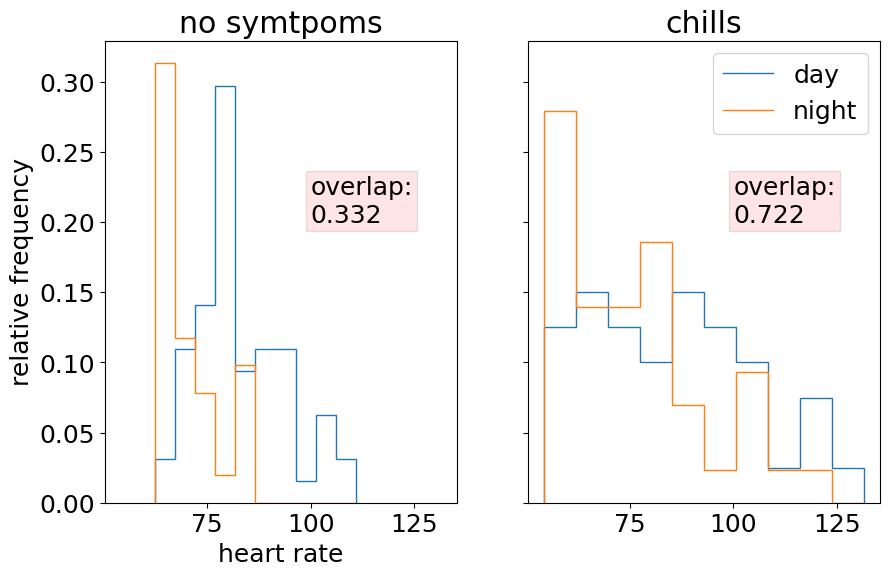

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=True, sharex = True) 
e = 10
sy_no = user_vs[ (user_vs[868]== True)]   
sy_shb = user_vs[ (user_vs[el[e]] == True)] 

     
n_a,bins = np.histogram(sy_no[(sy_no['time'] >= 29)&(sy_no['steps'].notna())]['hr'].dropna())
ax[0].stairs(n_a/len(sy_no[(sy_no['time'] >= 29)&(sy_no['steps'].notna())]['hr'].dropna()), bins, fill=False)
n_s = np.histogram(sy_no[(sy_no['time'] < 29)&(sy_no['steps'].isna())]['hr'].dropna(), bins = bins)[0]
ax[0].stairs(n_s/len(sy_no[(sy_no['time'] < 29)&(sy_no['steps'].isna())]['hr'].dropna()), bins, fill=False)
A = n_a/len(sy_no[(sy_no['time'] >= 29)&(sy_no['steps'].notna())]['hr'].dropna())
B = n_s/len(sy_no[(sy_no['time'] < 29)&(sy_no['steps'].isna())]['hr'].dropna())
    

ov = np.sum(np.minimum(A,B))
ax[0].text(100, 0.2, r'overlap:'+'\n'+str(np.round(ov,3)),
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 3})

n_a,bins = np.histogram(sy_shb[(sy_shb['time'] >= 29)&(sy_shb['steps'].notna())]['hr'].dropna())
ax[1].stairs(n_a/len(sy_shb[(sy_shb['time'] >= 29)&(sy_shb['steps'].notna())]['hr'].dropna()), bins, fill=False)
n_s = np.histogram(sy_shb[(sy_shb['time'] < 29)&(sy_shb['steps'].isna())]['hr'].dropna(), bins = bins)[0]
ax[1].stairs(n_s/len(sy_shb[(sy_shb['time'] < 29)&(sy_shb['steps'].isna())]['hr'].dropna()), bins, fill=False)
A = n_a/len(sy_shb[(sy_shb['time'] >= 29)&(sy_shb['steps'].notna())]['hr'].dropna())
B = n_s/len(sy_shb[(sy_shb['time'] < 29)&(sy_shb['steps'].isna())]['hr'].dropna())
    

ov = np.sum(np.minimum(A,B))
ax[1].text(100, 0.2, r'overlap:'+'\n'+str(np.round(ov,3)),
        bbox={'facecolor': 'red', 'alpha': 0.1, 'pad': 3})
ax[0].set_title('no symtpoms')   
ax[1].set_title(eln[e])   
ax[0].set_ylabel('relative frequency');
ax[0].set_xlabel('heart rate')
plt.legend(['day', 'night']);

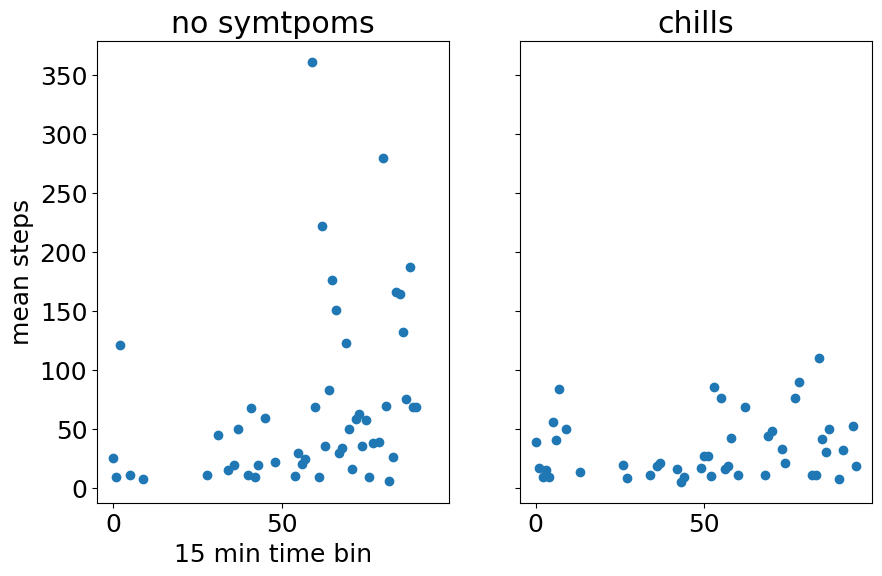

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,6) ,sharey=True, sharex = True) 

e = 10
sy_no = user_vs[ (user_vs[868]== True)]   
sy_shb = user_vs[ (user_vs[el[e]] == True)] 
ax[0].scatter(sy_no.groupby('time').mean().index, sy_no.groupby('time').mean()['steps'] )
ax[1].scatter(sy_shb.groupby('time').mean().index, sy_shb.groupby('time').mean()['steps'] )
ax[0].set_title('no symtpoms')   
ax[1].set_title(eln[e])   
ax[0].set_ylabel('mean steps');
ax[0].set_xlabel('15 min time bin');

## hros

In [17]:
    # group by day and hourly - sum up steps and take mean of heart rate
    # per day 24 time bins with steps summed up and mean of heart rate
    df_lcu_agg = []
    #for du in range(len(df_lcu[0])): 
    d = df_lcu[22].copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1
    
    d_agg = pd.DataFrame(columns = ['hr', 'd to max hr [%]', 'date', 'time','weekend', 'week_totest', 'phase',
       'steps', 'hros'])
    
    for day in d['date'].unique():
        d_day = d[d['date'] ==day]
        d_day_agg_m = d_day[['time', 'hr', 'd to max hr [%]']].groupby('time').mean().groupby(np.arange(96)//4).mean()
        d_day_agg_s = d_day[['time', 'steps']].groupby('time').sum().groupby(np.arange(96)//4).sum()
        hr = d_day_agg_m.loc[:,'hr']
        steps = d_day_agg_s.loc[:,'steps']
        
        
        d_day_agg_m['date'] = day
        d_day_agg_m['time'] = d_day_agg_m.index
        d_day_agg_m['weekend'] = d_day['weekend'].iloc[0]
        d_day_agg_m['week_totest'] = d_day['week_totest'].iloc[0]
        d_day_agg_m['phase'] = d_day['phase'].iloc[0]
        d_day_agg_m['steps'] = steps
        d_day_agg_m['hros'] = hr/steps
        
        
        d_agg = d_agg.append(d_day_agg_m)
    d_agg = d_agg.reset_index()
    df_lcu_agg.append(d_agg)

In [30]:
agguser_vs = pd.merge(user_vs, d_agg, how='outer', on = 'date')

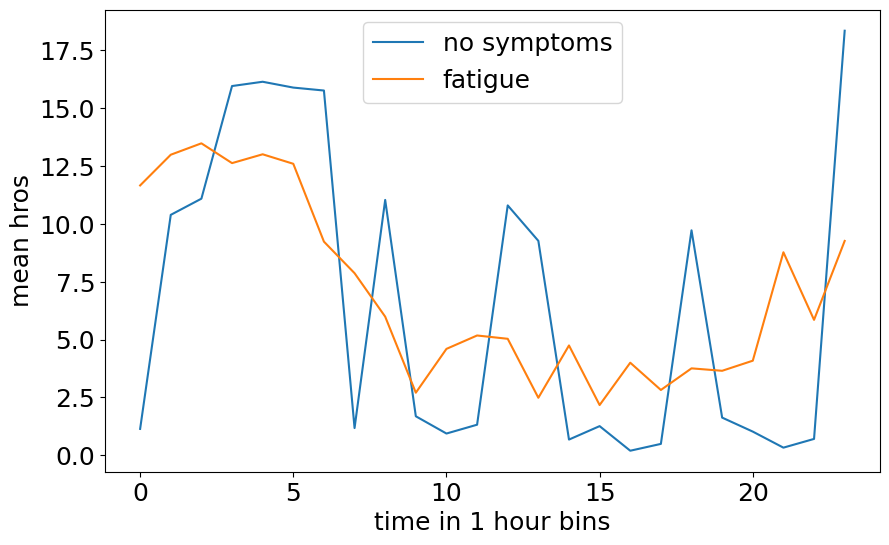

In [32]:

fig, ax = plt.subplots(1,1, figsize=(10,6), sharey=True)

e = 7

sy_no = agguser_vs[ (agguser_vs[868]== True)]   
sy_shb = agguser_vs[ (agguser_vs[el[e]] == True)]

ax.plot(range(len(sy_no.groupby('index').mean())), sy_no.groupby('index').mean()['hros'])
ax.plot(range(len(sy_shb.groupby('index').mean())), sy_shb.groupby('index').mean()['hros'])
ax.legend(['no symptoms', eln[e]])

ax.set_xlabel('time in 1 hour bins')
ax.set_ylabel('mean hros');

## overlap 

In [39]:
def sliding_window(elements, window_size):
    wi_days = []
    for i in range(len(elements)- window_size + 1):
         wi_days.append(elements[i:i+window_size])
    return wi_days

In [40]:
def get_ov(subd, bins):
    
    night = subd[(subd['time'] < 29)&(subd['steps'].isna())]['hr'].dropna()
    day = subd[(subd['time'] >= 29)&(subd['steps'].notna())]['hr'].dropna()
    n_d, _ = np.histogram(day, bins=bins)
    n_n, _ = np.histogram(night, bins=bins)
    d = n_d/len(day)
    n = n_n/len(night)
    
    return np.sum(np.minimum(n,d))

In [86]:
df = df_lcu[22]
df = df.sort_values(by='date')
binwidth = 15
bins=np.linspace(df['hr'].min(), df['hr'].max() + (binwidth/2), binwidth)
wi_list = sliding_window(df['date'].unique(),14)
ovs = []
for wi in wi_list:
    ovs.append(get_ov(df[df['date'].isin(wi)], bins))

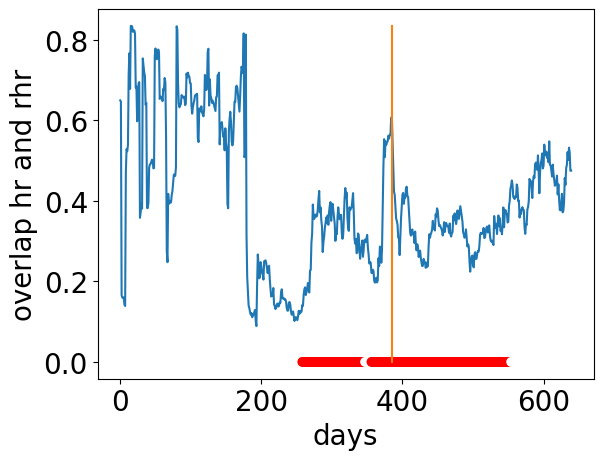

In [87]:
plt.plot(range(len(ovs)),ovs)
dd = df.groupby('date').sum()
plt.plot(10*list(np.where(dd.index == df['dt'].iloc[0])[0] ), np.linspace(0,max(ovs),10))
symp_bool = [np.any(user_vs[user_vs['date'].isin(wi_list[w])][el]) for w in range(len(wi_list))]
symp_col = ['red' if s else 'white' for s in symp_bool]
plt.scatter(range(len(ovs)), [0]*len(ovs), c=symp_col)
plt.xlabel('days')
plt.ylabel('overlap hr and rhr');